# Chinook Music Store
The Chinook Records Store Database is like a digital music shop's blueprint, packed with details about artists, songs, albums, customers, and purchases. It's a compact version of iTunes, neatly organizing everything into eleven tables. It's a valuable resource for music lovers and data fans, offering insights into how a music store operates.

<img src="Chinook.jpeg"> 

In [1]:
# Import python Libraries
import sqlite3 as sql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
db = "Chinook.db"

def run_query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q, conn)

# Genre Analysis for Album Selection: Identifying Top-Selling Genres in the USA

Chinook record store wants to select three albums to add from a list of four new artists, each belonging to different genres. The genres include Hip-Hop, Punk, Pop, and Blues. The record label focuses on US artists and plans to advertise in the USA.

<table>
  <tr>
    <th>Artist Name</th>
    <th>Genre</th>
  </tr>
  <tr>
    <td>Regal</td>
    <td>Hip-Hope</td>
  </tr>
  <tr>
    <td>Red Tone</td>
    <td>Punk</td> 
  </tr>
  <tr>
    <td>Meteor and the Girls</td>
    <td>Pop</td>
  </tr>    
  <tr>   
    <td>Slim Jim Bites</td>
    <td>Blues</td>
  </tr>
</table>

</body>
</html>

To decide which albums to choose, we need to find out which genres are most popular in the
USA. We'll do this by querying the database to see which genres sell the most tracks in the
USA. Based on this information, we'll make recommendations for the three artists whose albums
Chinook should purchase.

In [3]:
q = """
WITH usa_tracks AS
    (
    SELECT t.genre_id AS genre_id, il.invoice_line_id
    FROM track AS t
    INNER JOIN invoice_line AS il ON il.track_id = t.track_id
    INNER JOIN invoice AS i ON i.invoice_id = il.invoice_id
    WHERE i.billing_country = 'USA'
    )
SELECT g.name AS genre_name,
    COUNT(usa.genre_id) AS num_purchases,
    ROUND((CAST(COUNT(usa.genre_id) AS FLOAT) / (SELECT COUNT(genre_id) FROM usa_tracks)) * 100, 2) AS percentage_sold
FROM usa_tracks AS usa
INNER JOIN genre AS g ON g.genre_id = usa.genre_id
GROUP BY g.name
ORDER BY num_purchases DESC
"""


df = run_query(q)
df

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


C:\Users\HP\AppData\Local\Temp\ipykernel_2740\2706683778.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['genre_name'], fontsize=10.5, color='grey')


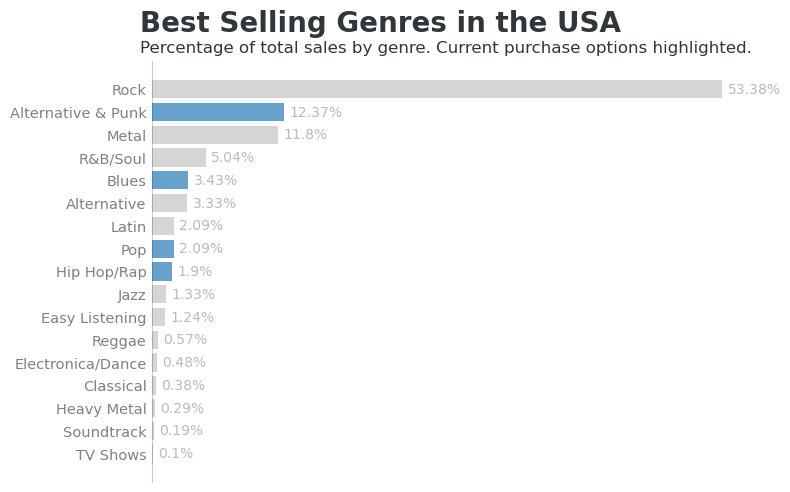

In [4]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by percentage of sales
df = df.sort_values(by='percentage_sold')

# Creating a color map to identify key albums of interest
album_options = ['Hip Hop/Rap', 'Alternative & Punk', 'Blues', 'Pop']
cmap = df['genre_name'].apply(lambda x: '#0064AB' if x in album_options else '#BABABA')

# Creating the bar plot
fig, ax = plt.subplots(figsize=(8, 5))  # Adjusted figsize
bars = ax.barh(df['genre_name'], df['percentage_sold'], height=0.8, color=cmap, alpha=0.6)

# Adding text and adjusting width of bars
for bar, percentage in zip(bars, df['percentage_sold']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage}%', va='center', ha='left', fontsize=10, color='#BABABA')

# Customizing axes and layout
ax.set_yticklabels(df['genre_name'], fontsize=10.5, color='grey')
ax.set_xticks([])
plt.text(-0.02, 1.07, 'Best Selling Genres in the USA',  fontsize=20, fontweight='bold', color= '#31363b', transform=plt.gca().transAxes)
plt.text(-0.02, 1.02, 'Percentage of total sales by genre. Current purchase options highlighted.', fontsize=12, color= '#31363b', transform=plt.gca().transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjusting left spine opacity
ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)

# Removing y-axis tick parameters
ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
plt.show()


# Results
Based on the genre sales pattern in the USA. Chnook should select these options from the list of available albums.

* **Punk:** Red Tone
* **Blues:** Slim Jim Bites
* **Pop:** Meteor and the Girls

It's worth noting that these three genres only make up 17% of the total sales. To maximize profitability, the company should be on the lookout for Rock songs since they hold account for 53% of sales in the US market.


# Employee Sales Performance Analysis

**The Situation**

After an initial purchase, each Chnook customeris assigned to a sales support agent. The company asked us to analyze purchase from customers belonging to each agent. They want to know if some agents are performing better or worse than others.

**Analysis**

Based on genre sales patterns in the USA, Chnook should consider albums from Punk, Blues, and Pop genres, despite collectively comprising only 17% of sales. Rock music dominates sales, representing 53% of the market, suggesting a significant profit potential. To maximize profitability, Chnook should focus on promoting Rock music. Additionally, analyzing sales performance of sales support agents is crucial for identifying high performers and implementing strategies for improvement. Overall, data-driven decision-making is essential for Chnook to succeed in the competitive music market.

In [5]:
q = """
        WITH t1 AS (SELECT em.first_name || ' ' || em.last_name AS sales_rep_name,
                           em.hire_date,
                           COUNT(cu.customer_id) AS num_invoices,
                           CAST(SUM(iv.total) AS INTEGER) AS total_sales
                      FROM employee em
                      JOIN Customer cu 
                        ON em.employee_id = cu.support_rep_id
                      JOIN invoice iv
                        ON iv.customer_id = cu.customer_id
                     GROUP BY 1
                     ORDER BY 4 DESC)
                     
        SELECT *,
                ROUND(CAST(total_sales AS FLOAT) / num_invoices, 2)
                   AS sales_per_customer
            FROM t1;
        """
df = run_query(q)
df


,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,Jane Peacock,2017-04-01 00:00:00,212,1731,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1393,7.41


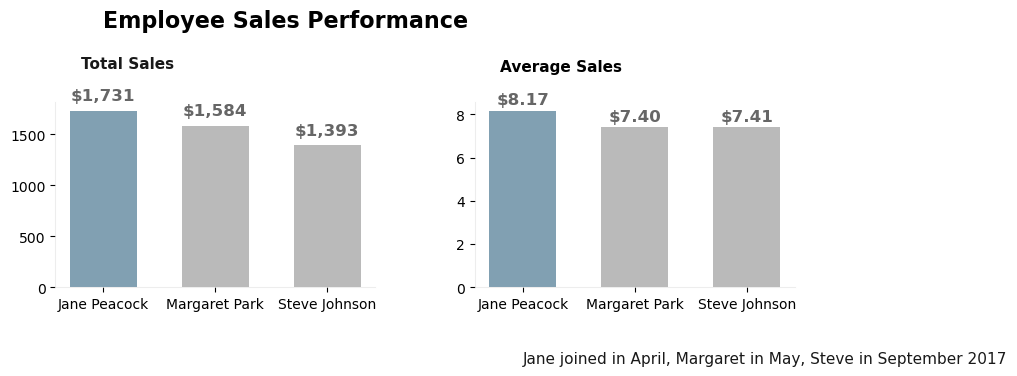

In [6]:
import matplotlib.pyplot as plt

# Data
sales_rep_name = df["sales_rep_name"].values
total_sales = df["total_sales"].values
sales_per_customer = df["sales_per_customer"].values

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Total sales chart
axes[0].bar(sales_rep_name, total_sales, color='#BABABA', width=0.6)
axes[0].bar(sales_rep_name[0], total_sales[0], color='#0064A0', alpha=0.3, width=0.6)

# Total sales chart Label
axes[0].text(x=-0.2, y=2150, s='Total Sales', size=11, fontweight='bold', alpha=0.9)

# Total sales annotations
for sales, index in zip(total_sales, range(3)):
    axes[0].text(x=index, y=sales+100, s='${:,}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=12)

# Main chart title
axes[0].text(x=0, y=2550, s='Employee Sales Performance', size=16, fontweight='bold')

# Average sales chart
axes[1].bar(sales_rep_name, sales_per_customer, color='#BABABA', width=0.6)
axes[1].bar(sales_rep_name[0], sales_per_customer[0], color='#0064A0', alpha=0.3, width=0.6)

# Average sales chart Label
axes[1].text(x=-0.2, y=10, s='Average Sales', size=11, fontweight='bold')

# Average sales annotations
for sales, index in zip(sales_per_customer, range(3)):
    axes[1].text(x=index, y=sales+0.3, s='${:,.2f}'.format(sales), ha='center', fontweight='bold', alpha=0.6, size=12)

# Footnote
axes[1].text(x=0, y=-3.5, s='Jane joined in April, Margaret in May, Steve in September 2017', size=11, alpha=0.9)

# Common attributes to both charts
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()


# Results
* Of the three sales employees, Jane achieved the highest total sales of 1,731 dollars. Margaret Park comes second, and Steve occupies the last place with 1,393 dollars in sales. This difference in sales is understandable, considering that Jane and Margaret were employed about five months before Steve.
* Jane's average sales numbers support her leading position. She has achieved 8.17 dollars in sales per customer, the highest of the three employees. Steve also performs marginally better than Margaret despite the difference in their employment dates.

**Sales by Country**

**The Situation**

Chinook wants to understand how sales are distributed across different countries. The company intends to identify countries with growth potential and may even run advertising campaigns in these countries.

**Analysis**

To answer this question, we will write a query that collates data on purchases from different countries. For each country, we will include the total number of customers, total sales value, average sales per customer, and the average order value. Where a country has only one customer, we will collect it into an "Other" group:


In [7]:
q = """

    -- Collate the number of customers in each country
    WITH t1 AS (SELECT country, COUNT(customer_id) AS num_customers
                    FROM customer
                    GROUP BY country
                ),
    
    -- Collate the total sales in each country
        t2 AS (SELECT cu.country,
                  ROUND(SUM(iv.total), 2) AS total_sales, 
                  COUNT(iv.invoice_id) AS num_sales
            FROM customer cu
            JOIN invoice iv
              ON cu.customer_id = iv.customer_id
           GROUP BY 1
          ),
          
    -- Group countries with only one customer as 'Others'
    t3 AS(SELECT CASE WHEN t1.num_customers = 1 THEN 'Others'
                       ELSE t1.country END AS countries,
                    SUM(t1.num_customers) AS num_customers,
                    SUM(t2.total_sales) AS total_sales,
                    SUM(t2.num_sales) AS num_sales
                  FROM t1
                  JOIN t2
                    ON t1.country = t2.country
                 GROUP BY 1
            )
            
    -- Calculate relevant sales metrics
    SELECT countries,
           num_customers,
           total_sales,
           ROUND(total_sales / num_sales, 2) AS avg_order_value,
           ROUND(total_sales / num_customers, 2) AS sales_per_customer
    FROM (
            SELECT *,
                CASE WHEN countries = 'Others' THEN 1
                          ELSE 0 END AS sort
            FROM t3
        )
    ORDER BY sort, num_customers DESC;
"""

df = run_query(q)
df


,countries,num_customers,total_sales,avg_order_value,sales_per_customer
0,USA,13,1040.49,7.94,80.04
1,Canada,8,535.59,7.05,66.95
2,Brazil,5,427.68,7.01,85.54
3,France,5,389.07,7.78,77.81
4,Germany,4,334.62,8.16,83.66
5,United Kingdom,3,245.52,8.77,81.84
6,Czech Republic,2,273.24,9.11,136.62
7,India,2,183.15,8.72,91.58
8,Portugal,2,185.13,6.38,92.57
9,Others,15,1094.94,7.45,73.00


In [8]:
# Additional caLcuLations
avg_cust_purchase = df.sales_per_customer.mean()
print(avg_cust_purchase)
df['pcent_customer'] = round(100*df.num_customers / df.num_customers.sum(),1)
df['pcent_sales'] = round(100*df.total_sales / df.total_sales.sum(), 1)
df['cust_purchase_diff'] = round(100 * (df.sales_per_customer - avg_cust_purchase)/avg_cust_purchase, 2)


86.96100000000001


In [9]:
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer,pcent_customer,pcent_sales,cust_purchase_diff
0,USA,13,1040.49,7.94,80.04,22.0,22.1,-7.96
1,Canada,8,535.59,7.05,66.95,13.6,11.4,-23.01
2,Brazil,5,427.68,7.01,85.54,8.5,9.1,-1.63
3,France,5,389.07,7.78,77.81,8.5,8.3,-10.52
4,Germany,4,334.62,8.16,83.66,6.8,7.1,-3.80
5,United Kingdom,3,245.52,8.77,81.84,5.1,5.2,-5.89
6,Czech Republic,2,273.24,9.11,136.62,3.4,5.8,57.10
7,India,2,183.15,8.72,91.58,3.4,3.9,5.31
8,Portugal,2,185.13,6.38,92.57,3.4,3.9,6.45
9,Others,15,1094.94,7.45,73.00,25.4,23.2,-16.05


In [10]:
(136.62 - 86.96100000000001)/86.96100000000001

0.5710490909718148

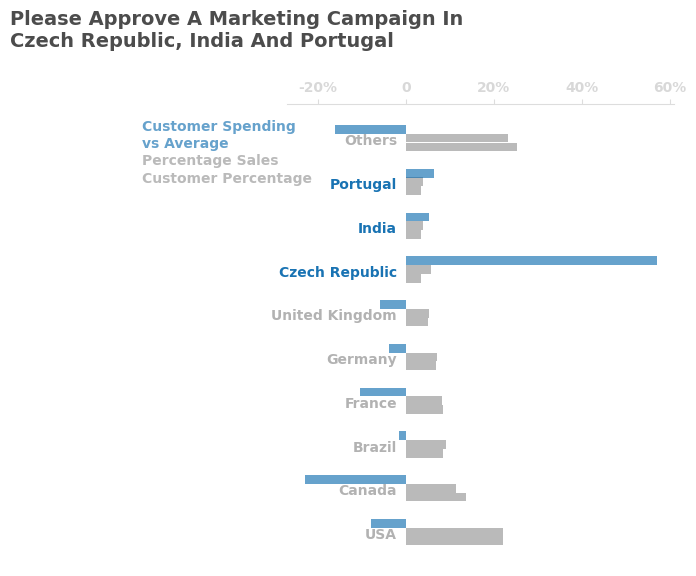

In [11]:
#test

#Visualization
y_labs = df.countries.values
y_axes = np.arange(df.countries.size)
fig = plt.figure(figsize=(5, 6))
plt.barh(y_axes-0.3, df.pcent_customer, height=0.2, color='#BABABA')
plt.barh(y_axes-0.1, df.pcent_sales, height=0.2, color='#BABABA')
plt.barh(y_axes+0.1, df.cust_purchase_diff, height=0.2, color='#0064AB', alpha=0.6)

color_map = ['', '','','','','','Yes', 'Yes', 'Yes', '']

#Annotate y axis ticks
for loc, label, color in zip(y_axes, y_labs, color_map):
    if color == 'Yes':
        plt.text(x=-2, y=loc-0.25, s=label, ha='right', color ='#0064AB', alpha=0.9, size=10, fontweight='bold')
    else:
        plt.text(x=-2, y=loc-0.25, s=label, ha='right', size=10, alpha=0.3, fontweight='bold')

#Set plot legend
plt.text(x=-60, y=8.7, s='Customer Spending\nvs Average', color='#0064AB',
        size=10, alpha=0.6, fontweight='bold')
plt.text(x=-60, y=8.3, s='Percentage Sales', color='#BABABA', size=10, fontweight='bold') 
plt.text(x=-60, y=7.9, s='Customer Percentage', color='#BABABA', size=10, fontweight='bold')

#Set plot title
plt.text(x=-90, y=11, s='Please Approve A Marketing Campaign In\nCzech Republic, India And Portugal', alpha=0.7,
         size=14, fontweight='bold')

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True, bottom=True, top=False)
    ax.tick_params(left=False, bottom=False, color='#ddd')
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20, 0, 20, 40, 60], ['-20%', '0', '20%', '40%', '60%'],
            color='grey', size=10, alpha=0.3, fontweight='bold')



# Result

•The Majority of Chinook sales arise from **US** and **Canada**. These two countries dominate in customer base as well as sales. However, customers spend lesser per invoice in these countries.

•Although the **Czech Republic**, **Portugal**, and **India** record fewer customers and lesser sales values, customers spend more per invoice than in other countries. To increase revenue from these three markets, Chinook could run marketing campaigns to expand its customer base.

Since the data from each country are relatively few, the initial marketing campaigns should be small. They should aim to collect and analyze customer data so that the right trends are confidently identified.


# How Many Tracks Never Sell?

To answer this question, we will have to distriguish between the entire inventory of tracks in the track table and the distinct instances of tracks from the invoice_line table.

In [12]:
q= """ WITH all_and_purchased AS
        (
        SELECT t.track_id all_tracks, il.track_id AS purchased_tracks
        FROM track AS t
        LEFT JOIN invoice_line il ON il.track_id=t.track_id
        )

SELECT COUNT(DISTINCT a.all_tracks) total_tracks,
       COUNT (DISTINCT a.purchased_tracks) tracks_purchased,
       COUNT(DISTINCT a.all_tracks) - COUNT(DISTINCT a.purchased_tracks) not_purchased,
       ROUND(COUNT (DISTINCT a.purchased_tracks) / CAST(COUNT(DISTINCT a.all_tracks) AS float), 2)percent_purchased
FROM all_and_purchased AS a;"""

purchased = run_query(q)
purchased

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,0.52


In [13]:
purchased = purchased.T
purchased = purchased. iloc[[1,2],0]
purchased_list = purchased.tolist()

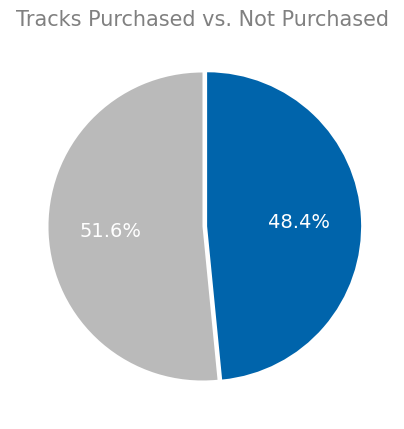

In [14]:
# Plot
plt.pie(purchased_list,
    explode=(0, 0.03),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 14, 'color': 'white'},
    colors=('#BABABA', '#0064AB'))

# Plot Aesthetics
plt.title('Tracks Purchased vs. Not Purchased', fontsize = 15, color = 'gray')
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

# Observations

* Surprisingly, almost half of the track inventory at Chinook has not sold. Let's take a look at the bottom performers and see if we can learn more.

In [15]:
q="""
SELECT ar.name artist_name,
    g.name genre,
    COUNT(il.track_id) units_sold
FROM track t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
INNER JOIN genre as g ON g.genre_id = t.genre_id
GROUP BY artist_name
HAVING units_sold = 0
ORDER BY units_sold;"""

run_query(q)

,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0


# Observations

74 artists have not sold any units, with most of these tracks belonging to the classical music genre.

Half of the company's inventory remains unsold, potentially tying up working capital without generating returns.

Depending on the payment arrangement with record labels, there are two scenarios to consider:

1. If Chinook pays a fixed fee to host these tracks, it might be wise to focus on more popular genres and discontinue signing less successful artists.


2. if Chniook pays the record label based on sales percentage, there is little downside to keeping the track in the store.

Regardless of the scenario, Chinook should explore ways to promote these low-selling artists. Suggestions could be integrated into the purchasing process or displayed on the website's cart page to increase exposure.

**Albums vs Individual Tracks**

The Chinook store allows customers to buy music in two ways: either as a complete album or as individual tracks. However, customers cannot buy a full album and then add individual tracks to the same purchase unless they select each track manually. When customers purchase albums, they are charged the same price as if they had bought each track separately.

Management is contemplating a new purchasing approach to cut costs. Instead of buying every track from an album, they are considering purchasing only the most popular tracks from each album from record companies.
